In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from tqdm import tqdm 
import time

In [5]:
#Funciones
def dr(pr):
    return pr

def ds(r,ps):
    return ps/(pow(r,2))

def dpr(r,s,ps,t,R,delta=7.0147e-12,w=2.6617e-6,mu=0.0123):
    f1=pow(ps,2)/pow(r,3)
    f21=(mu/R)
    f22=(r-np.cos(s-w*t))
    f23=f21*f22
    f24=(1/pow(r,2))
    f25=f24+f23
    f2=delta*f25
    return (f1)-(f2)

def dps(r,s,t,R,delta=7.0147e-12,w=2.6617e-6,mu=0.0123):
    f11=delta*mu*r
    f12=pow(R,3)
    f1=f11/f12
    f2=np.sin(s-w*t)
    return -(f1*f2)

def fR(r,s,t,w=2.6617e-6):
    f2=pow(r,2)
    f3=2*r*np.cos(s-w*t)
    return np.sqrt(1+f2-f3)
    

In [6]:
#RK4

#condiciones iniciales
ro=1
so=1
pro=1
pso=1

#tiempo
l=1e3

t=np.arange(0,l)
M=np.array([[ro,so,pro,pso]])

it=range(0,4)

L=len(t)
h=abs(t[0]-t[L-1])/L

#F=[dr,ds,dpr,dps]

for i in range(1,L):
    m=M[i-1,:]
    nd=[]
    for f in it:
        p=(h/6)
        K=0
        if f == 0:
            k1 = dr(m[2])
            k2 = dr(m[2]+0.5*k1*h)
            k3 = dr(m[2]+0.5*k2*h)
            k4 = dr(m[2]+k3*h)
            K=k1+2*k2+2*k3+k4
            
        elif f == 1:
            k1 = ds(m[0],m[3])
            k2 = ds(m[0]+0.5*k1*h,m[3]+0.5*k1*h)
            k3 = ds(m[0]+0.5*k2*h,m[3]+0.5*k2*h)
            k4 = ds(m[0]+k3*h,m[3]+k3*h)
            K=k1+2*k2+2*k3+k4
            
        elif f == 2:
            R1=fR(m[0],m[1],t[i-1])
            k1 = dpr(m[0],m[1],m[3],t[i-1],R1)
            
            R2=fR(m[0]+(0.5*k1*h),m[1]+(0.5*k1*h),t[i-1]+(0.5*k1*h))
            k2 = dpr(m[0]+(0.5*k1*h),m[1]+(0.5*k1*h),m[3]+(0.5*k1*h),t[i-1]+(0.5*k1*h),R2)
            
            R3=fR(m[0]+(0.5*k2*h),m[1]+(0.5*k2*h),t[i-1]+(0.5*k2*h))
            k3 =dpr(m[0]+(0.5*k2*h),m[1]+(0.5*k2*h),m[3]+(0.5*k2*h),t[i-1]+(0.5*k2*h),R3)
            
            R4=fR(m[0]+(k3*h),m[1]+(k3*h),t[i-1]+(k3*h))
            k4 =dpr(m[0]+(k3*h),m[1]+(k3*h),m[3]+(k3*h),t[i-1]+(k3*h),R4)
            
            
            K=k1+2*k2+2*k3+k4
            
        elif f == 3:

            R1=fR(m[0],m[1],t[i-1])
            k1 = dps(m[0],m[1],t[i-1],R1)
            
            R2=fR(m[0]+(0.5*k1*h),m[1]+(0.5*k1*h),t[i-1]+(0.5*k1*h))
            k2 = dps(m[0]+(0.5*k1*h),m[1]+(0.5*k1*h),t[i-1]+(0.5*k1*h),R2)
            
            R3=fR(m[0]+(0.5*k2*h),m[1]+(0.5*k2*h),t[i-1]+(0.5*k2*h))
            k3 = dps(m[0]+(0.5*k2*h),m[1]+(0.5*k2*h),t[i-1]+(0.5*k2*h),R3)
            
            R4=fR(m[0]+(k3*h),m[1]+(k3*h),t[i-1]+(k3*h))
            k4 = dps(m[0]+(k3*h),m[1]+(k3*h),t[i-1]+(k3*h),R4)
            
            K=k1+2*k2+2*k3+k4
            
        p=m[f]+p*K
        nd.append(p)
    M=np.vstack((M,nd))


In [7]:
w=2.6617e-6
d= 3.844e8

r=M[:,0]
s=M[:,1]

x=np.multiply(r,np.cos(s))
y=np.multiply(r,np.sin(s))

xl=d*np.cos(w*t)
yl=d*np.sin(w*t)


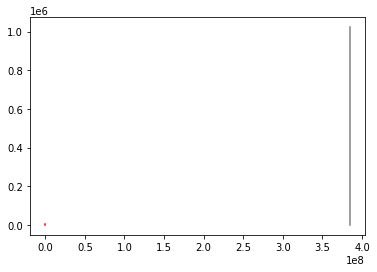

In [8]:
plt.plot(x,y, color="red",  label="Nave")
plt.plot(xl,yl, color="grey",  label="Luna")

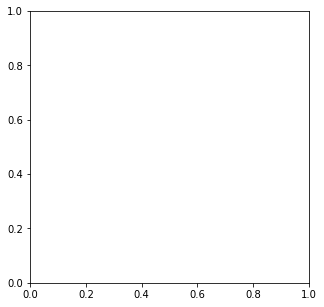

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(t[i]), fontsize=15)
    plot=ax.scatter(x[i],y[i], color="red", marker="v", label="Nave")
    plot=ax.scatter(xl[i],yl[i], color="grey", marker=".", label="Luna")
    plot=ax.scatter(0,0, color="blue", marker="o", label="Tierra")
    plot=ax.legend()

    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)